# Imports

In [1]:
import pandas as pd
import numpy as np
import scipy
import math

# sklearn
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# deep learning
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score

## Import DATA
Примечание: обосновать почему из датасета убираем первые 22 строчки из ноубука 2

In [4]:
df1 = pd.DataFrame(pd.read_excel('./data/X_bp.xlsx', index_col=0))
df2 = pd.DataFrame(pd.read_excel('./data/X_nup.xlsx', index_col=0))
df = pd.concat([df1, df2], join='inner', axis=1)
df = df[23:]
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
23                           2.587348       1953.274926   
24                           2.499918       1942.595777   
25                           2.046471       2037.631811   
26                           1.856476       2018.220332   
27                           3.305535       1917.907506   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
23              1136.596135                   137.627420   
24               901.519947                   146.252208   
25               707.570887                   101.617251   
26               836.294382                   135.401697   
27               478.286247                   105.786930   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
23                          22.344534                234.716883   
24                          23.081757                351.231874   
25                          23.146393                312.307205   
26                          26.435515                327.510377   
27                          17.874100                328.154579   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
23                       555.893453                             80.803222   
24                       864.725484                             76.178075   
25                       547.601219                             73.817067   
26                       150.961449                             77.210762   
27                       526.692159                             72.345709   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
23                      2587.342983               246.613117   
24                      3705.672523               226.222760   
25                      2624.026407               178.198556   
26                      2473.187195               123.344561   
27                      3059.032991               275.575880   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
23                

In [5]:
Y = df['Соотношение матрица-наполнитель']
Y_1 = df['Модуль упругости при растяжении, ГПа']
Y_2 = df['Прочность при растяжении, МПа']
df_ = df.drop('Соотношение матрица-наполнитель', axis=1)
df_1 = df.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
df_2 = df.drop(['Прочность при растяжении, МПа'], axis=1)

In [6]:
df_copy = df.copy()
df = df.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)

# Разобьем данные на кластеры

## Подбор оптимального количества кластеров

### Метод локтя для подбора оптимального количества кластеров

In [7]:
distortions = []
for i in range(1, 30):
    kmeans = KMeans(
        n_clusters=i, # На сколько кластеров поделить наш ДС
        init='random', # Начальная инициализация центров кластеров
        n_init=10, # Начальное колиечтво этих точек (центров класстеров)
        max_iter=300, # 
        tol=1e-04 # Величина изменения при сдвиге
    )
    kmeans_prediction = kmeans.fit_predict(df)
    # plt.title(f"Clasterisations result with {i} clusters")
    # Draw our points
    # plt.scatter(df[:, 0], df[:, 1], c=kmeans_prediction)
    # Draw our clusters centers
    # plt.scatter(*kmeans.cluster_centers_.T, # Вызываем наши центыр и транспонируем нашу матрицу
    #             marker='*', 
    #             s=200, 
    #             color='r')
    # plt.show()
    distortions.append(kmeans.inertia_)

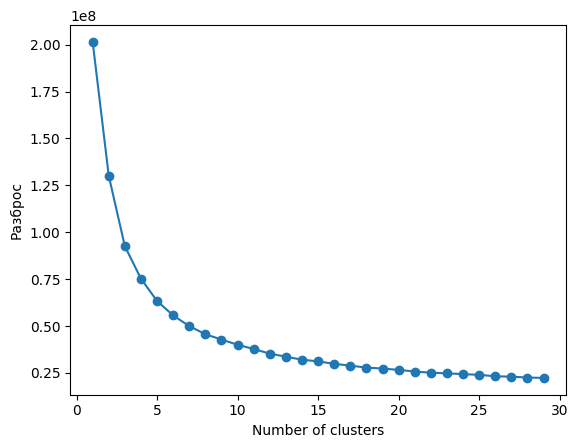

In [8]:
plt.plot(range(1,30), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Разброс')
plt.show()

Оптимальным, с виду, колличеством класстеров является 15

### Для визуализации адекватности разбития данных будем использовать TSNE

In [9]:
tsne_clusters_number = TSNE(n_components=2, init='random').fit_transform(df)
tsne_clusters_number

array([[-25.72643  ,  -7.9006295],
       [-19.218496 ,  17.129568 ],
       [ -0.6307259,   4.3221283],
       ...,
       [  7.6793203,  25.017334 ],
       [ -6.414431 ,  11.083438 ],
       [  6.0392337,  24.791582 ]], dtype=float32)

### На основании вышеполученной информации, попроубем разбить данные на 8 класстеров

In [10]:
kmeans = KMeans(
    n_clusters=8, # На сколько кластеров поделить наш ДС
    init='random', # Начальная инициализация центров кластеров
    n_init=10, # Начальное колиечтво этих точек (центров класстеров)
    max_iter=300, # 
    tol=1e-04 # Величина изменения при сдвиге
)
kmeans_prediction = kmeans.fit_predict(df)

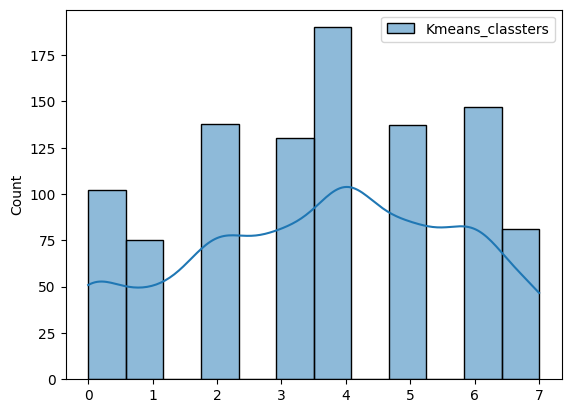

In [11]:
# Смотрим распределение данных по кластерам
sns.histplot(data = {"Kmeans_classters": kmeans_prediction}, 
             kde=True)
plt.show()

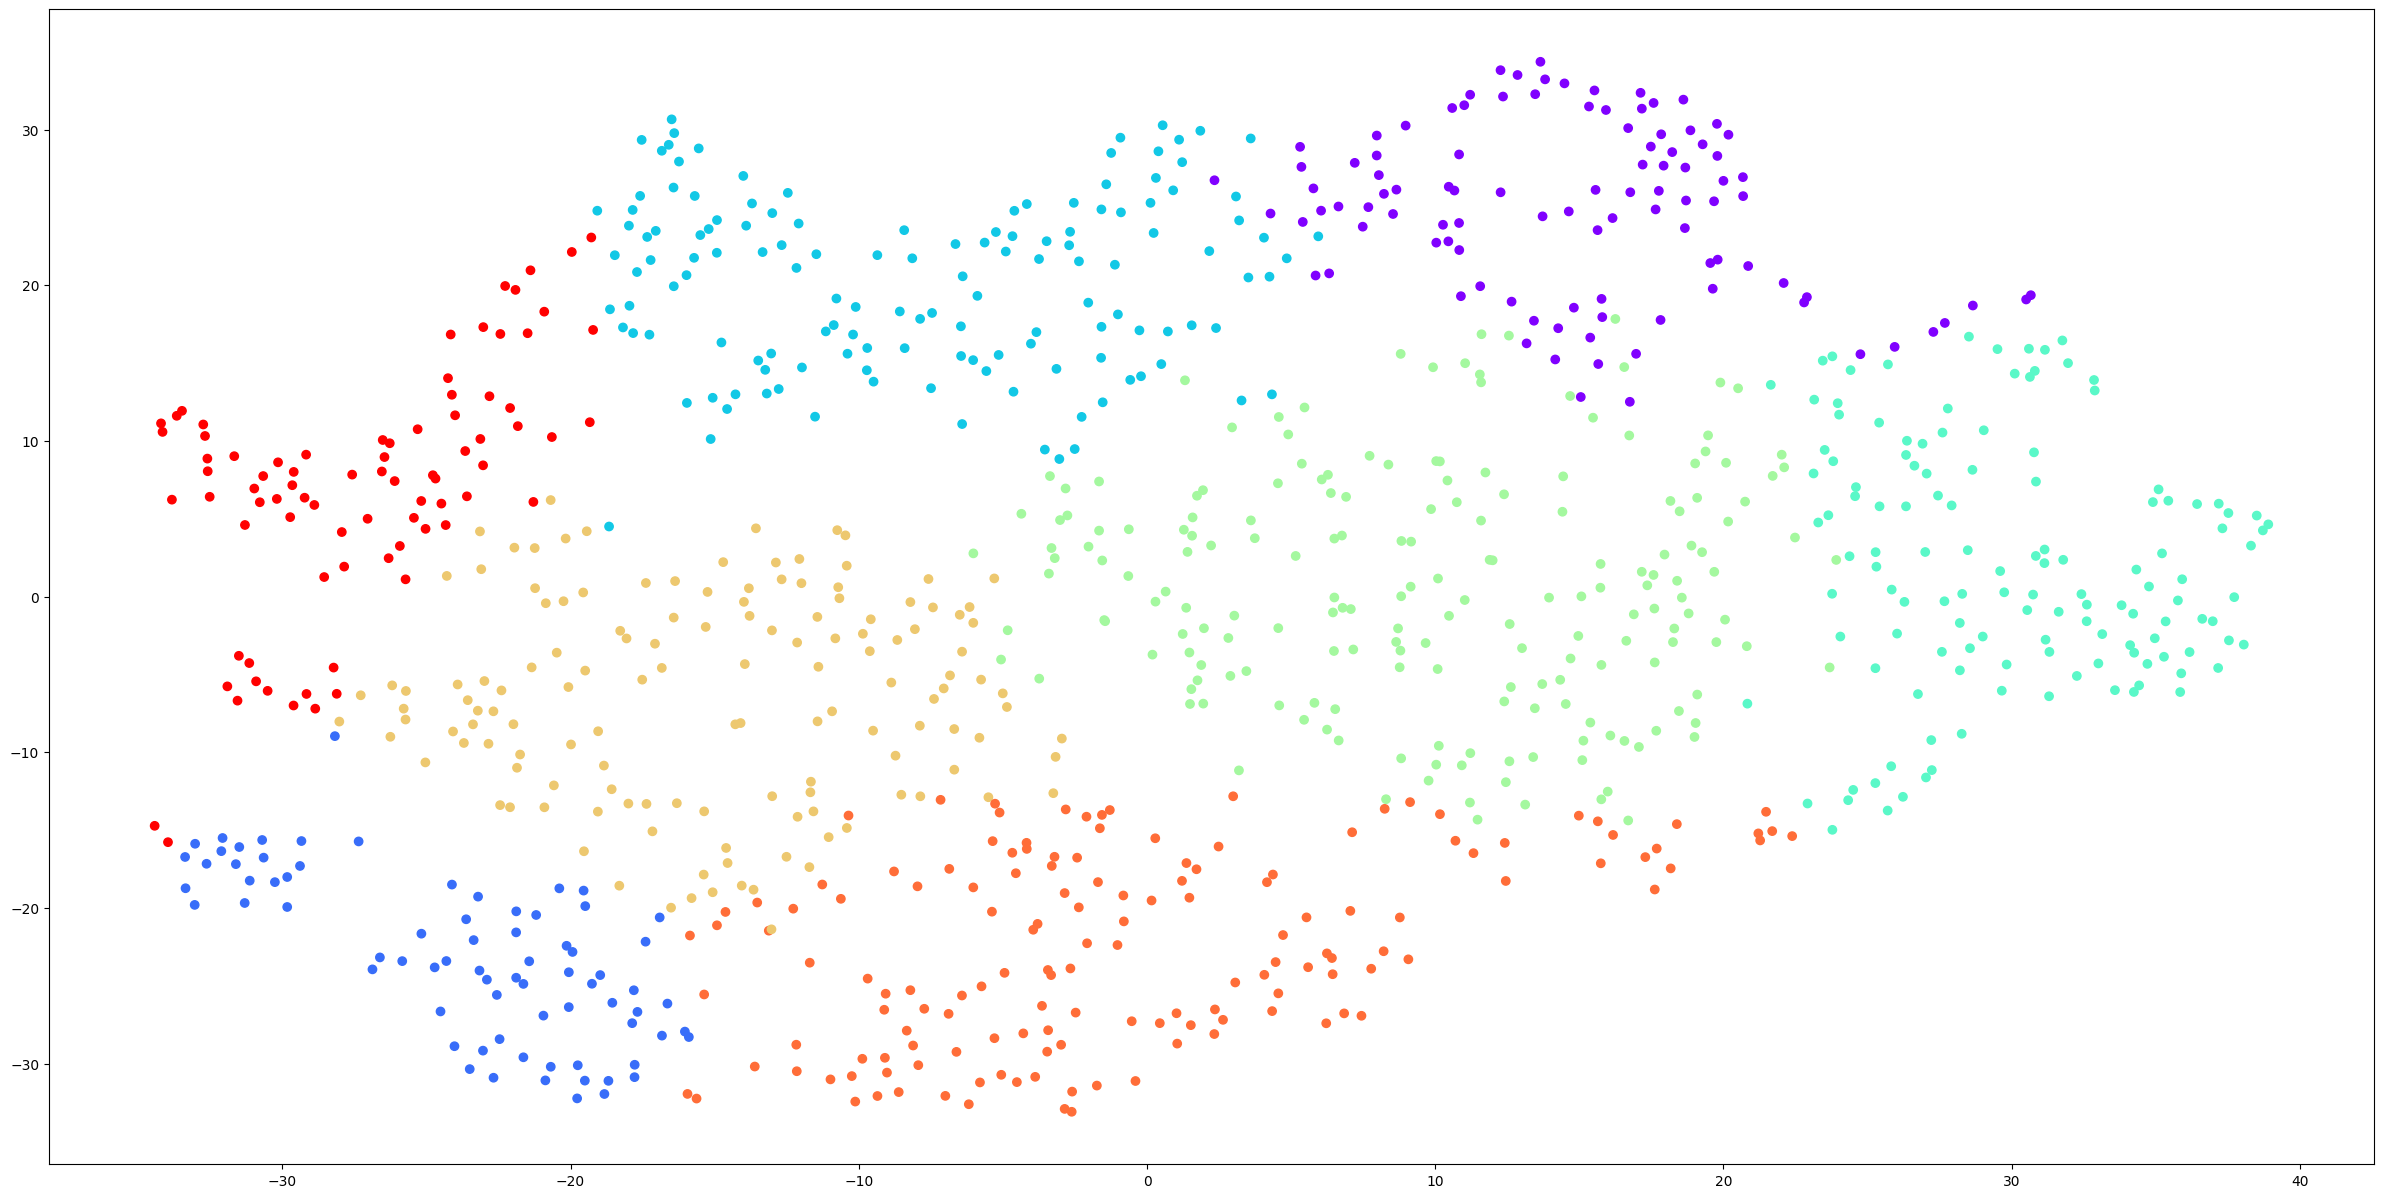

In [12]:
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot()
ax.scatter(tsne_clusters_number[:, 0], tsne_clusters_number[:, 1], c=kmeans.labels_, marker='o', cmap='rainbow')
# ax.set_title("%s: (%.2g sec)" % (label, t1 - t0))
ax.axis('tight')
plt.show()

### На основании вышеполученной информации, попроубем разбить данные на 9 класстеров

In [13]:
kmeans = KMeans(
    n_clusters=9, # На сколько кластеров поделить наш ДС
    init='random', # Начальная инициализация центров кластеров
    n_init=10, # Начальное колиечтво этих точек (центров класстеров)
    max_iter=300, # 
    tol=1e-04 # Величина изменения при сдвиге
)
kmeans_prediction = kmeans.fit_predict(df)

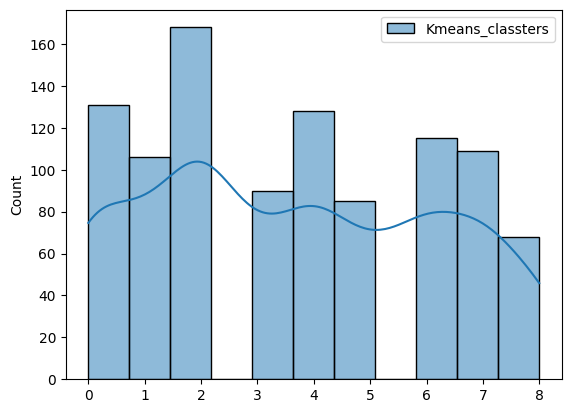

In [14]:
# Смотрим распределение данных по кластерам
sns.histplot(data = {"Kmeans_classters": kmeans_prediction}, 
             kde=True)
plt.show()

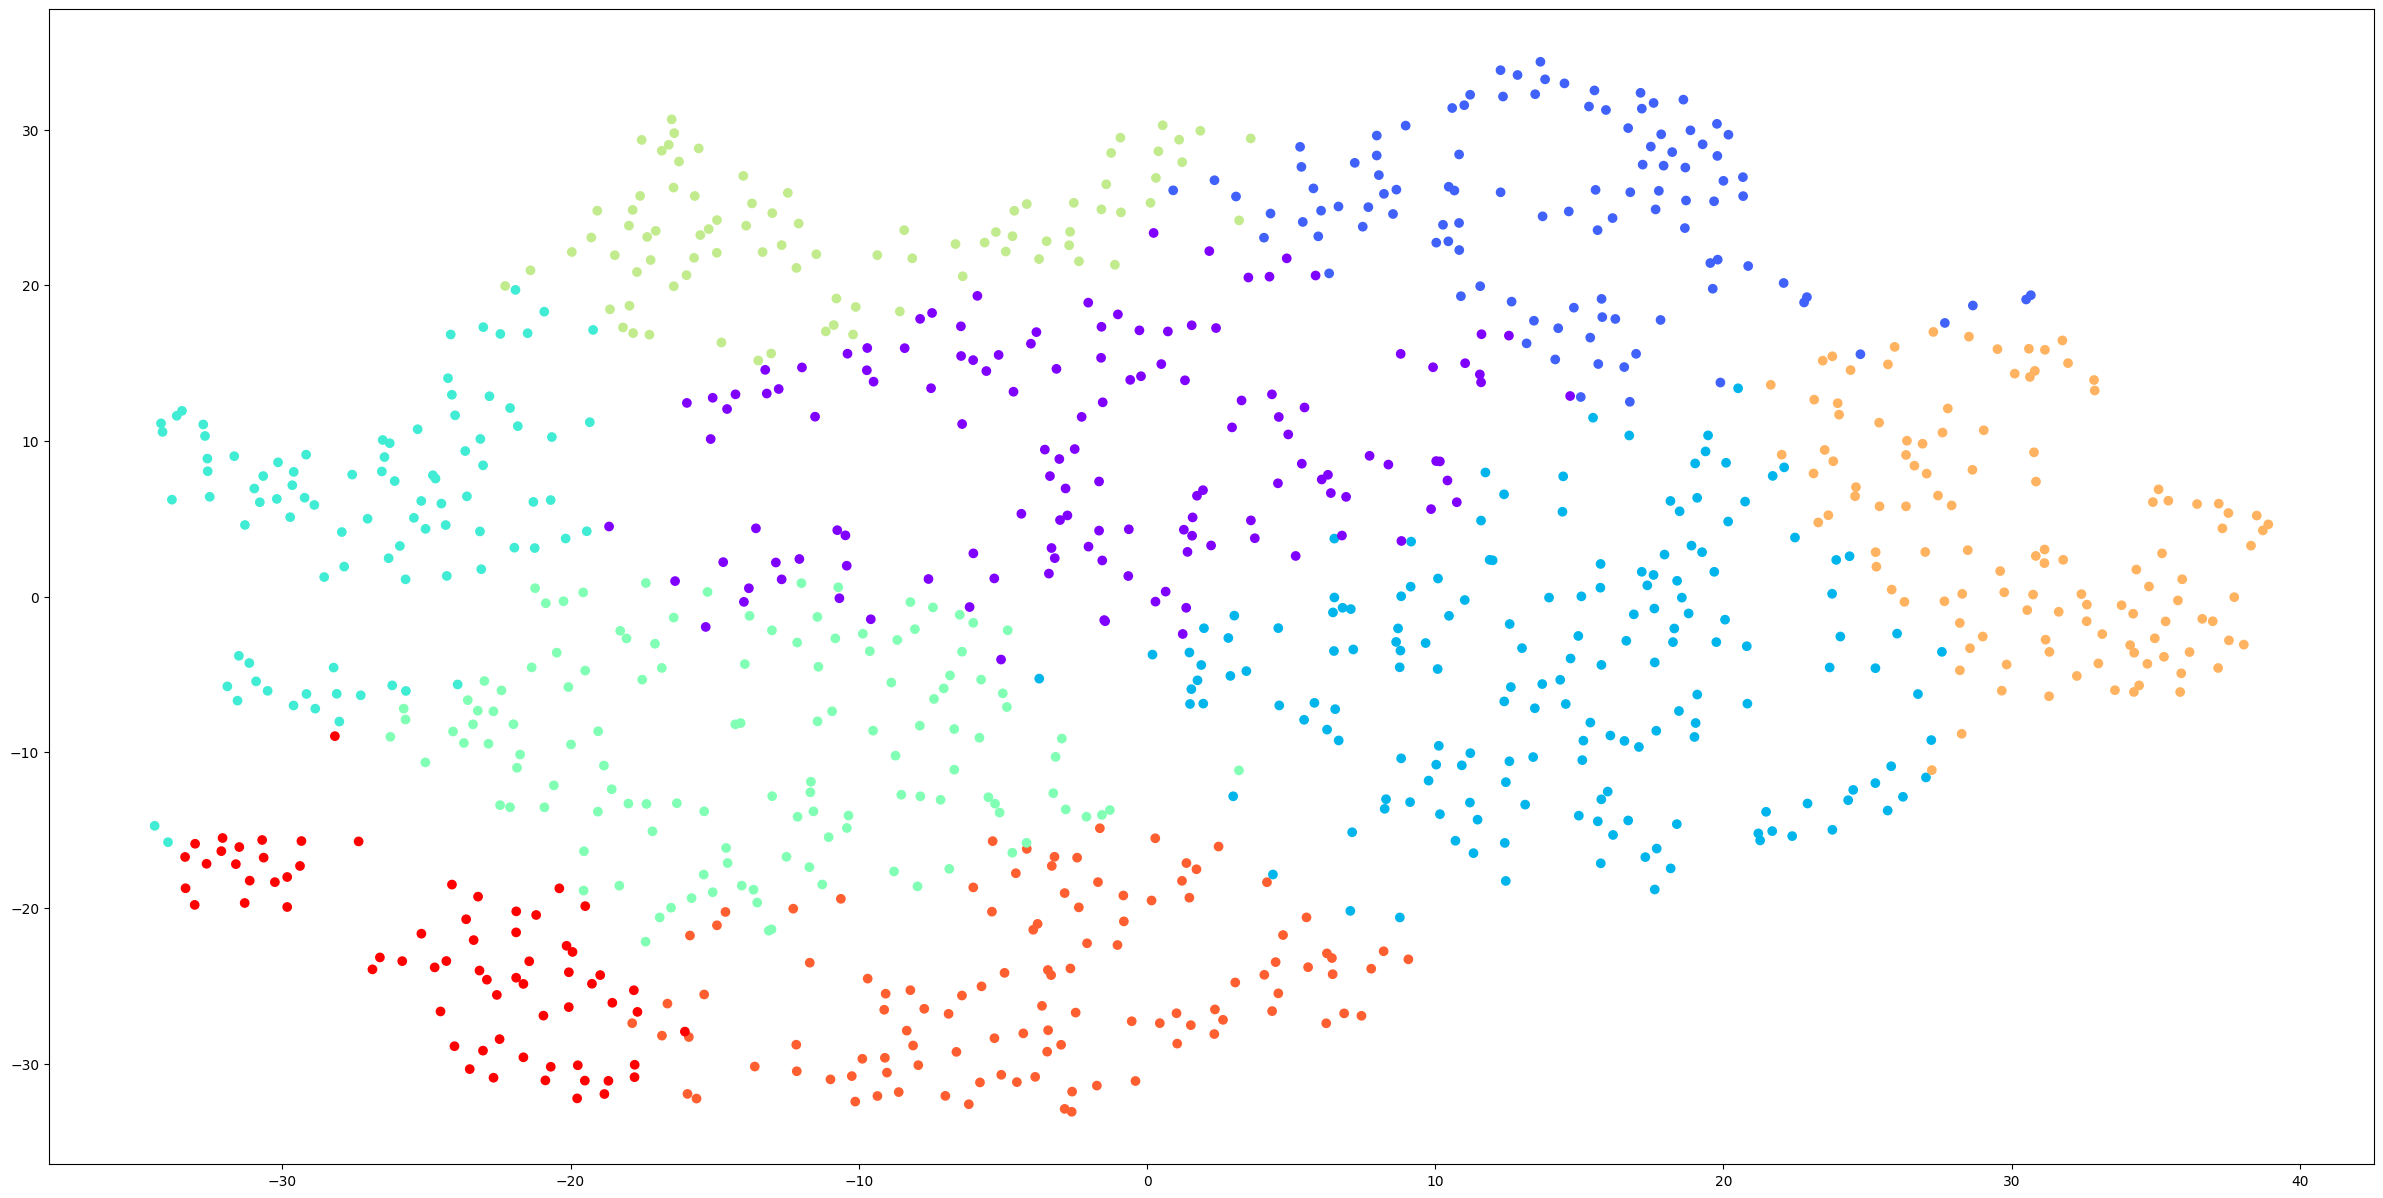

In [15]:
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot()
ax.scatter(tsne_clusters_number[:, 0], tsne_clusters_number[:, 1], c=kmeans.labels_, marker='o', cmap='rainbow')
# ax.set_title("%s: (%.2g sec)" % (label, t1 - t0))
ax.axis('tight')
plt.show()

Как мы видим один из кластеров пустой, имеет смысл разбить на 8

### На основании вышеполученной информации, попроубем разбить данные на 10 класстеров

In [16]:
kmeans = KMeans(
    n_clusters=15, # На сколько кластеров поделить наш ДС
    init='random', # Начальная инициализация центров кластеров
    n_init=10, # Начальное колиечтво этих точек (центров класстеров)
    max_iter=300, # 
    tol=1e-04 # Величина изменения при сдвиге
)
kmeans_prediction = kmeans.fit_predict(df)

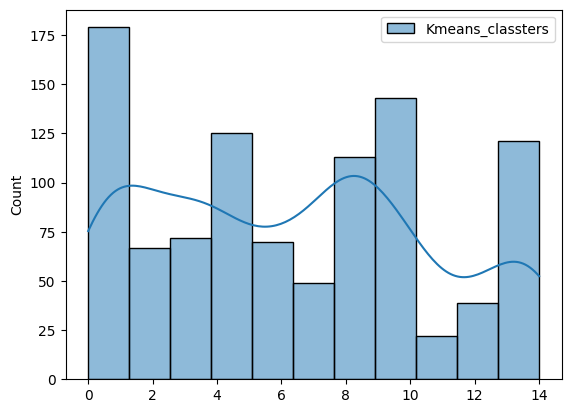

In [17]:
# Смотрим распределение данных по кластерам
sns.histplot(data = {"Kmeans_classters": kmeans_prediction}, 
             kde=True)
plt.show()

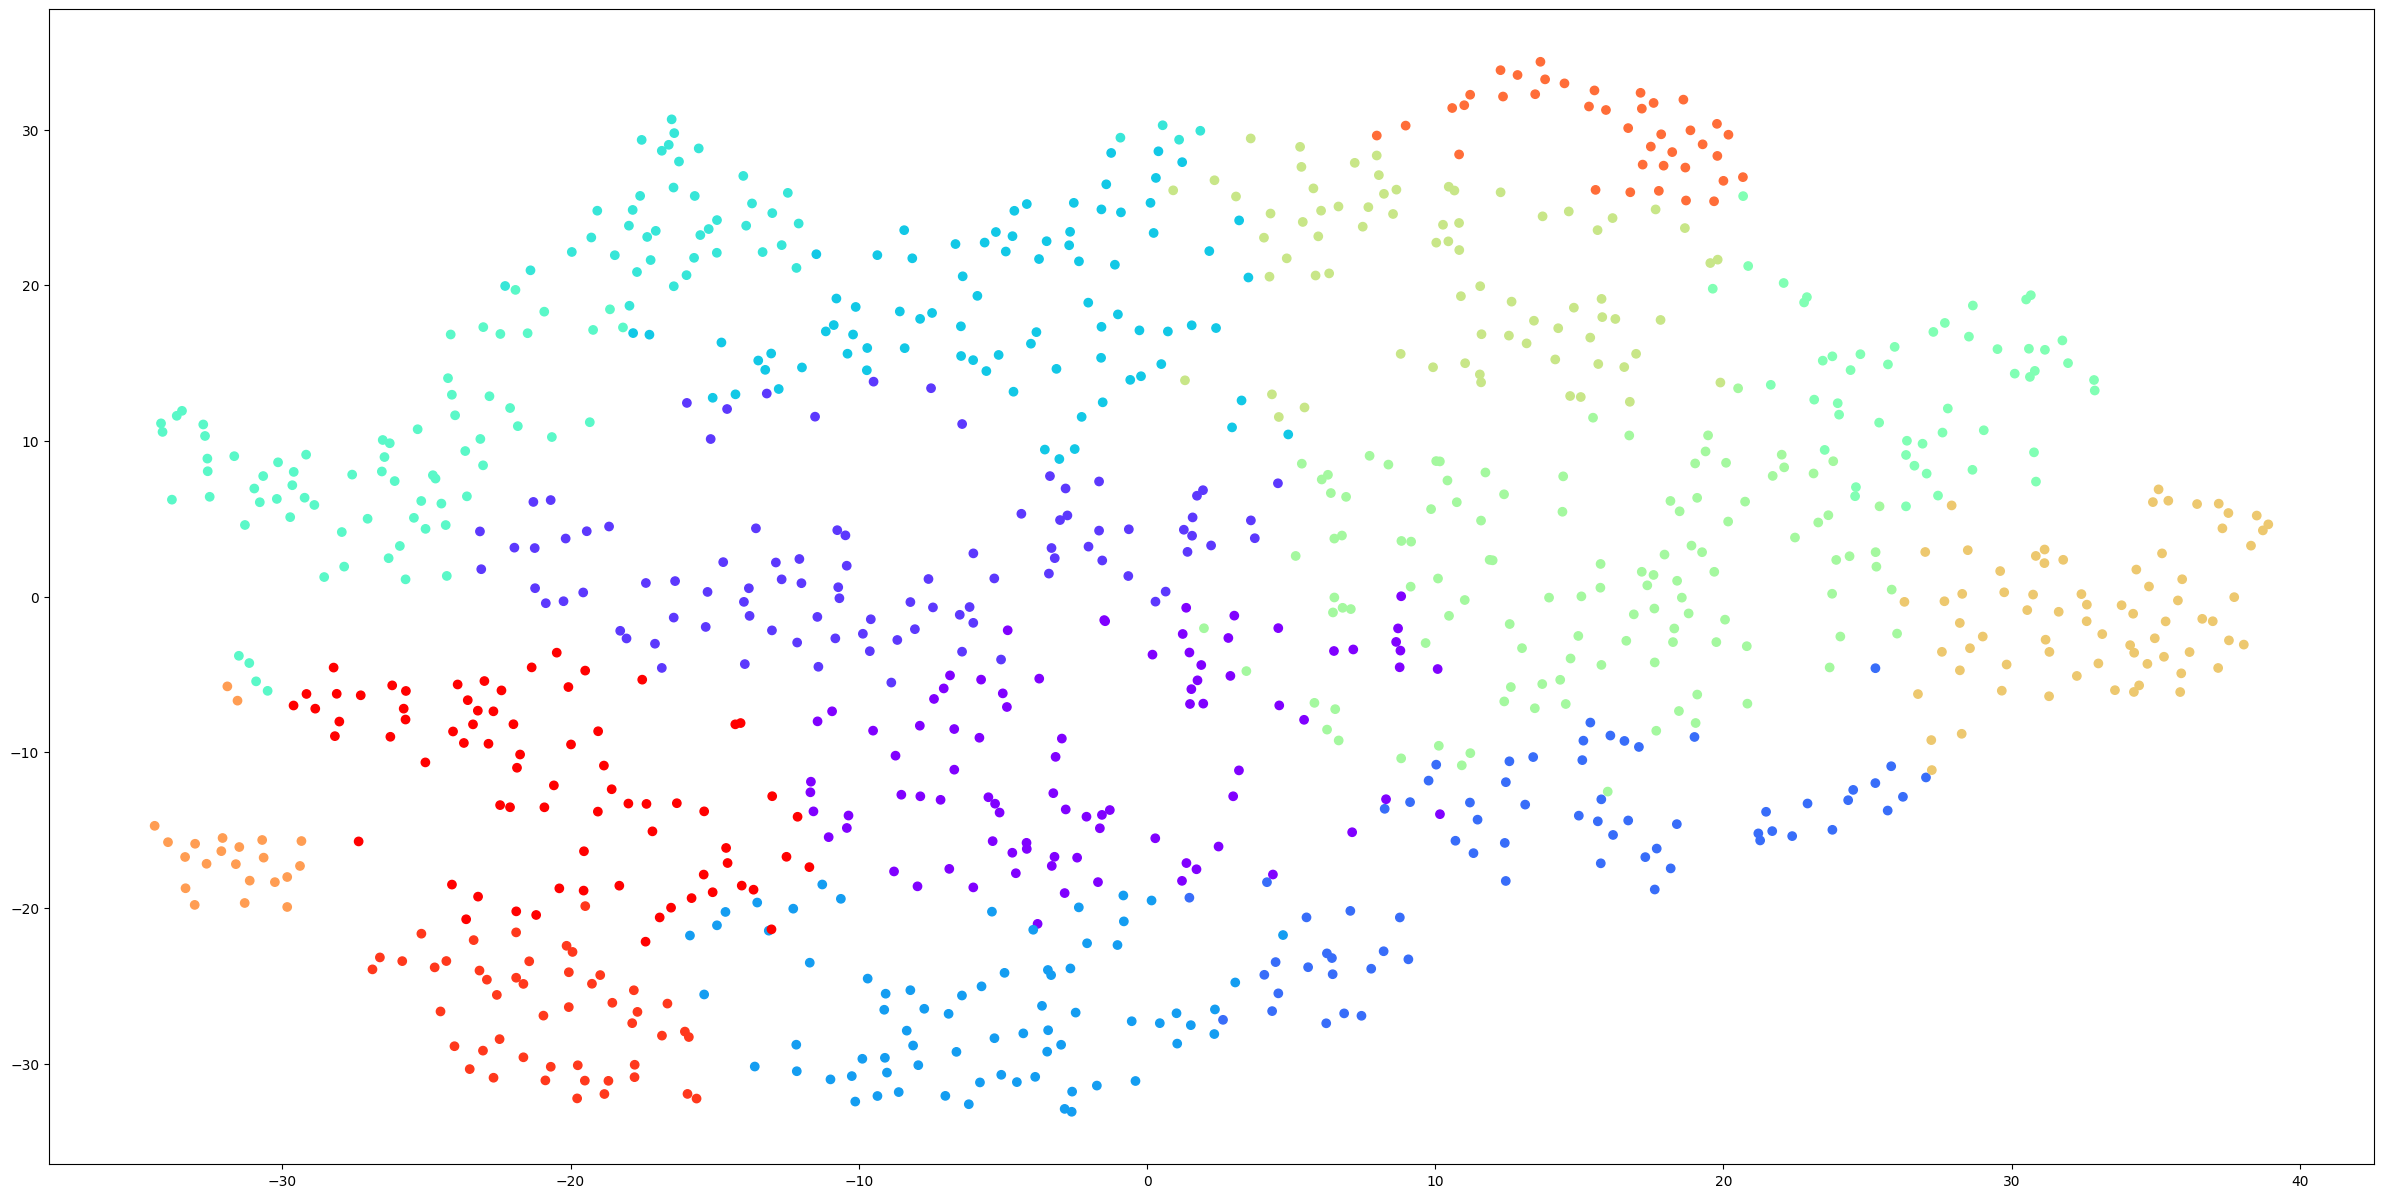

In [18]:
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot()
ax.scatter(tsne_clusters_number[:, 0], tsne_clusters_number[:, 1], c=kmeans.labels_, marker='o', cmap='rainbow')
# ax.set_title("%s: (%.2g sec)" % (label, t1 - t0))
ax.axis('tight')
plt.show()

### На основании вышеполученной информации, попроубем разбить данные на 11 класстеров

In [19]:
kmeans = KMeans(
    n_clusters=11, # На сколько кластеров поделить наш ДС
    init='random', # Начальная инициализация центров кластеров
    n_init=10, # Начальное колиечтво этих точек (центров класстеров)
    max_iter=300, # 
    tol=1e-04 # Величина изменения при сдвиге
)
kmeans_prediction = kmeans.fit_predict(df)

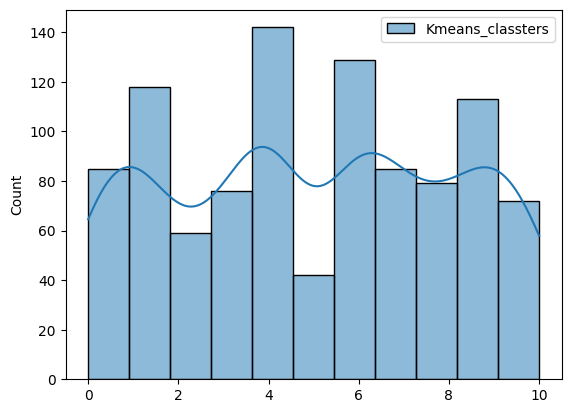

In [20]:
# Смотрим распределение данных по кластерам
sns.histplot(data = {"Kmeans_classters": kmeans_prediction}, 
             kde=True)
plt.show()

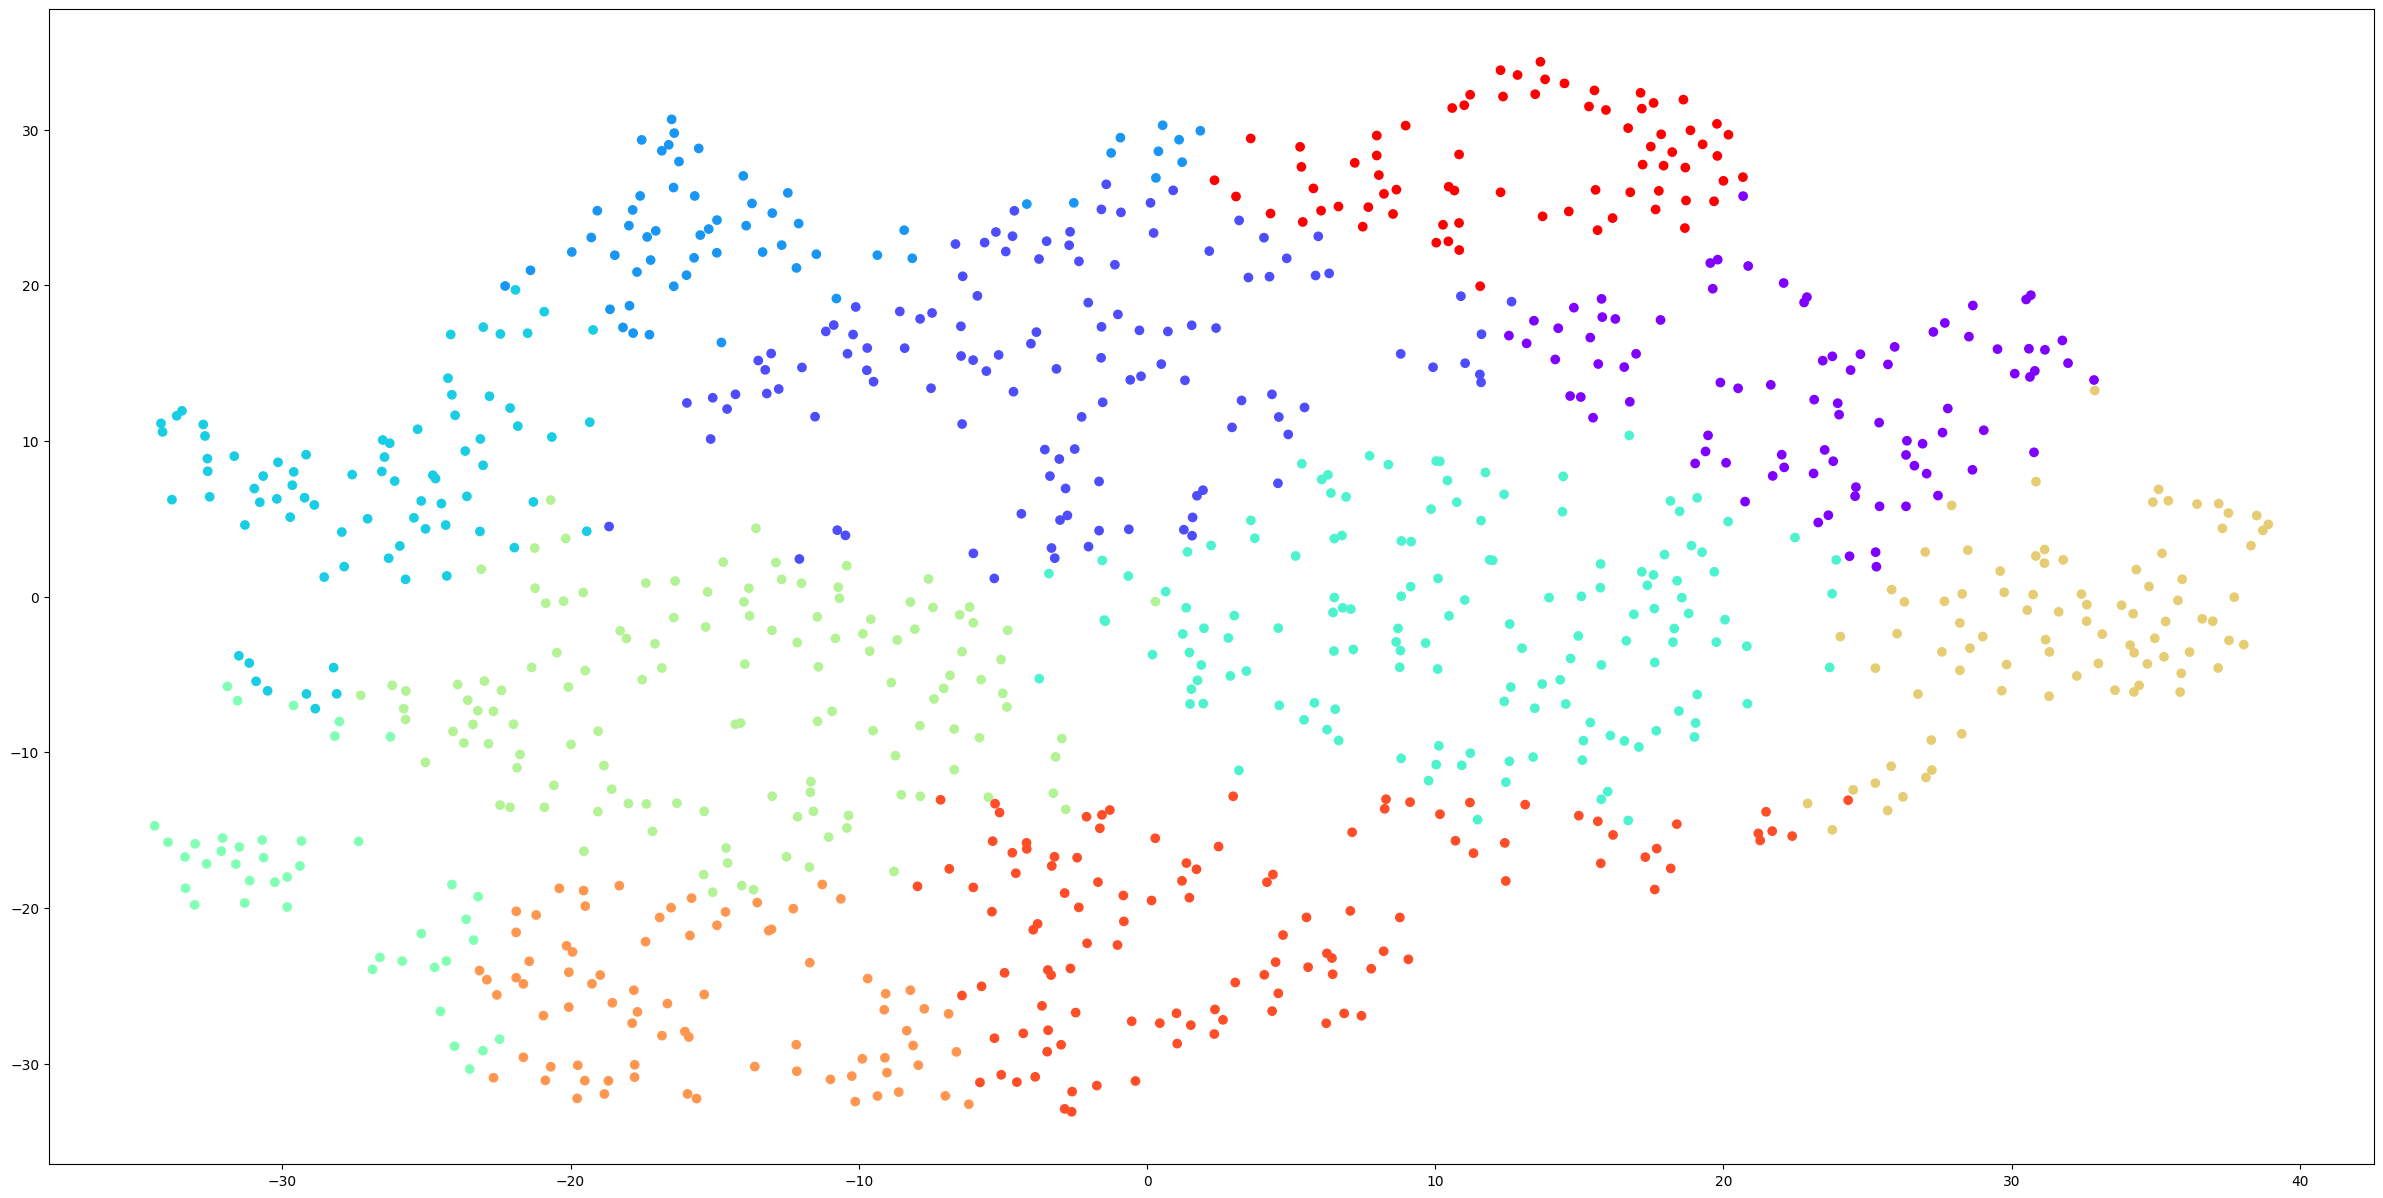

In [21]:
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot()
ax.scatter(tsne_clusters_number[:, 0], tsne_clusters_number[:, 1], c=kmeans.labels_, marker='o', cmap='rainbow')
# ax.set_title("%s: (%.2g sec)" % (label, t1 - t0))
ax.axis('tight')
plt.show()

### На основании вышеполученной информации, попроубем разбить данные на 12 класстеров

In [22]:
kmeans = KMeans(
    n_clusters=15, # На сколько кластеров поделить наш ДС
    init='random', # Начальная инициализация центров кластеров
    n_init=10, # Начальное колиечтво этих точек (центров класстеров)
    max_iter=300, # 
    tol=1e-04 # Величина изменения при сдвиге
)
kmeans_prediction = kmeans.fit_predict(df)

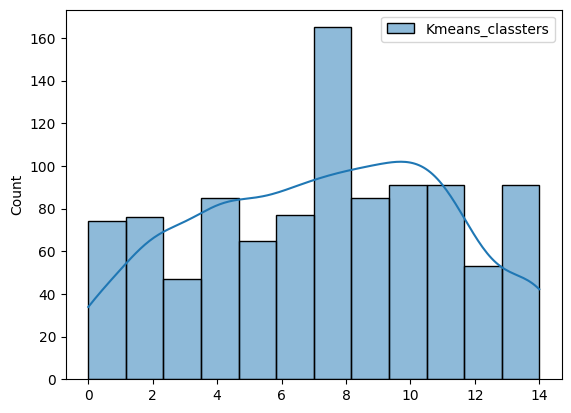

In [23]:
# Смотрим распределение данных по кластерам
sns.histplot(data = {"Kmeans_classters": kmeans_prediction}, 
             kde=True)
plt.show()

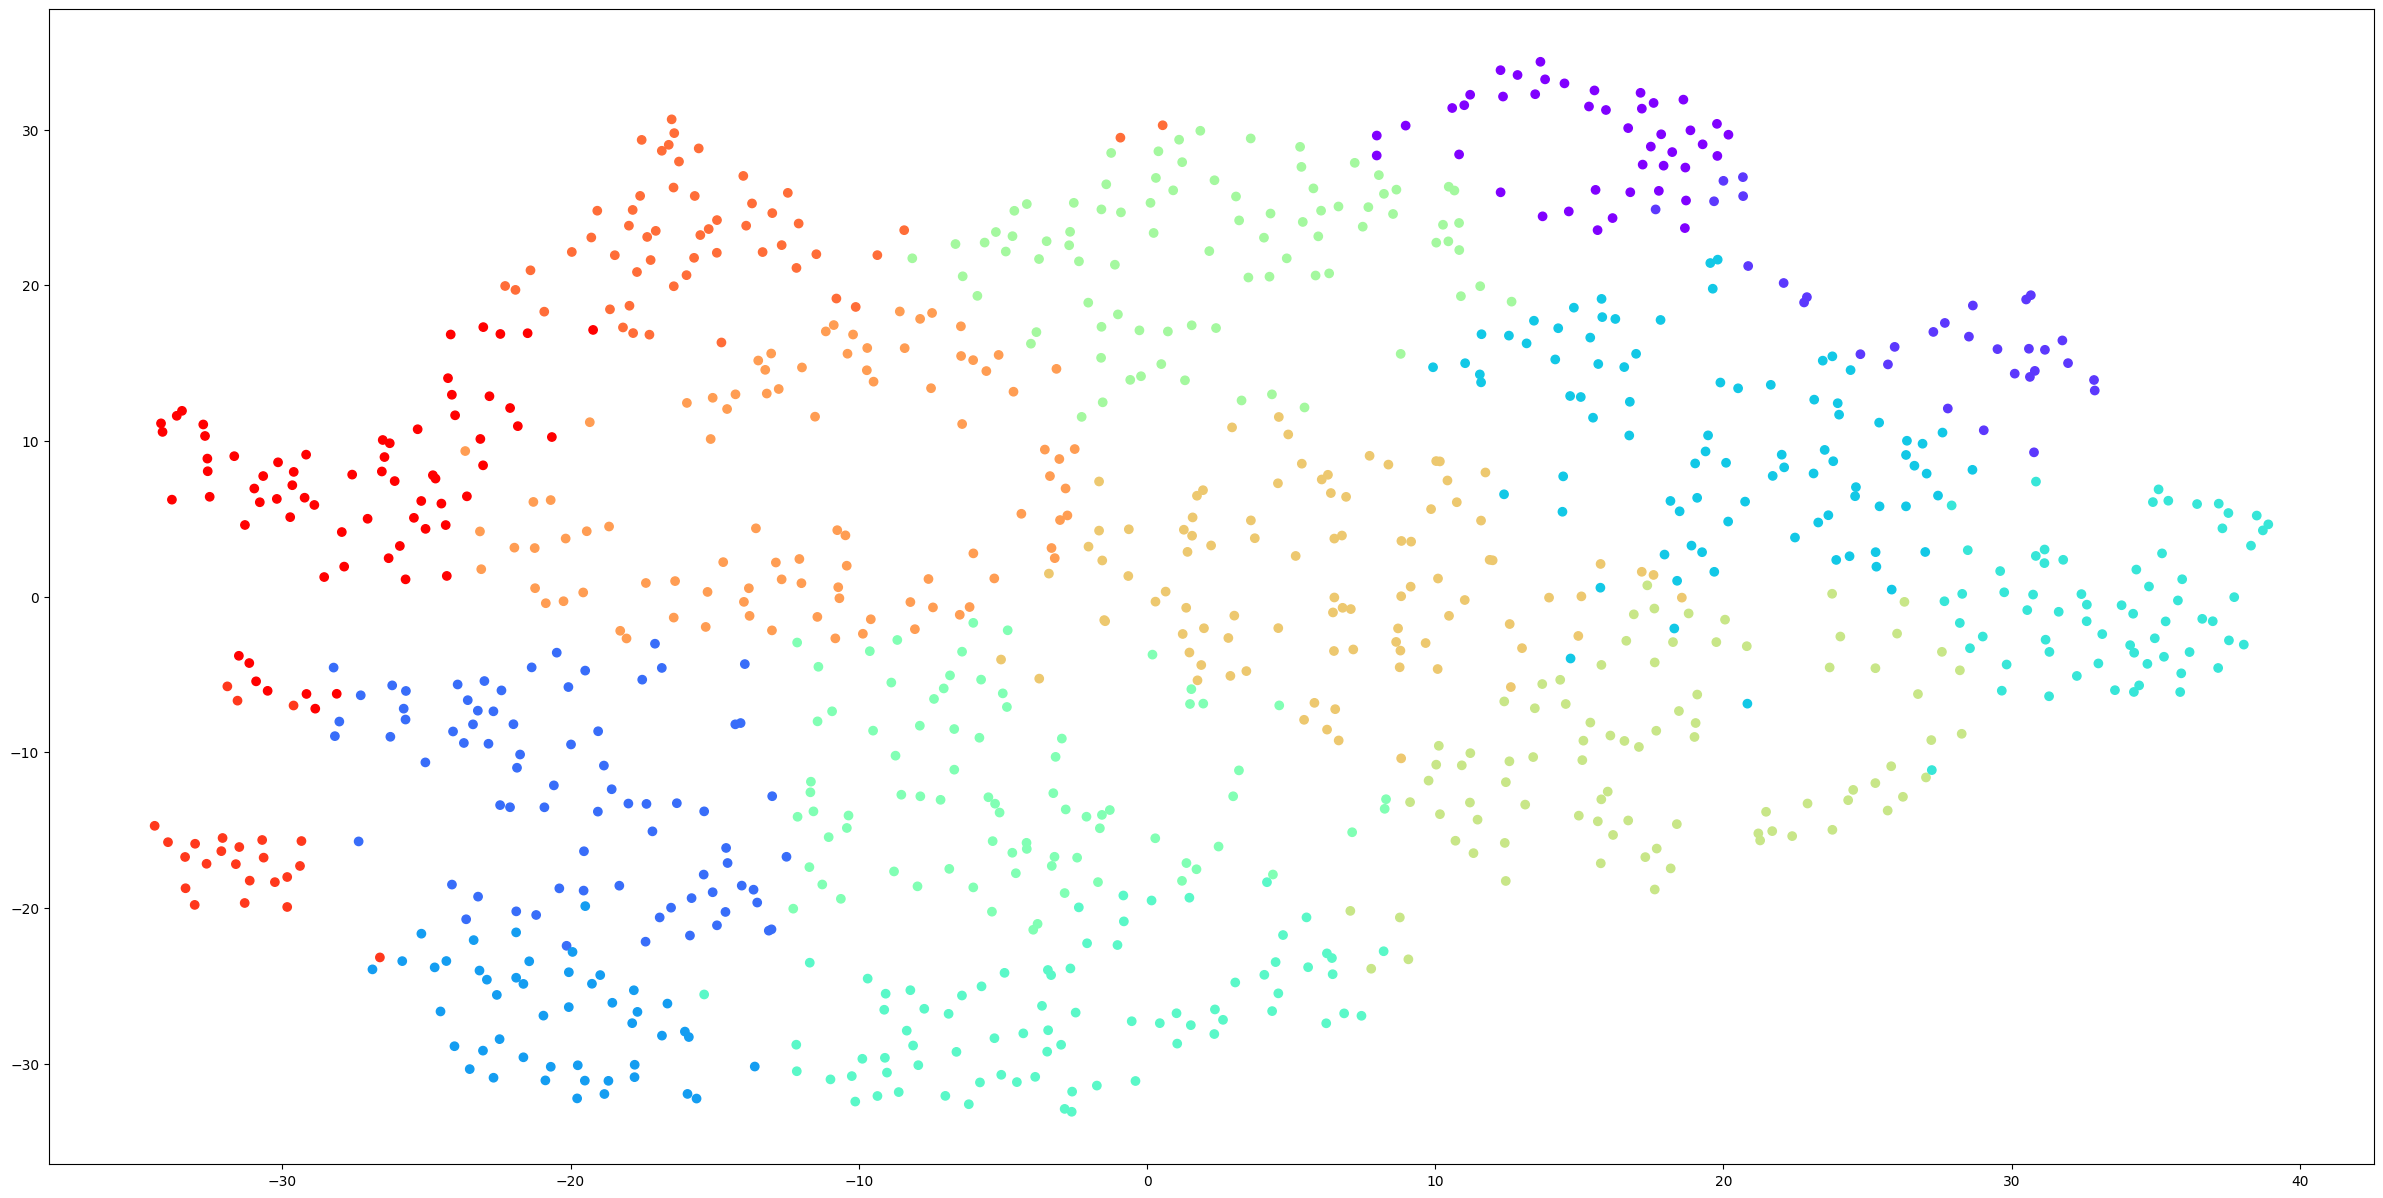

In [24]:
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot()
ax.scatter(tsne_clusters_number[:, 0], tsne_clusters_number[:, 1], c=kmeans.labels_, marker='o', cmap='rainbow')
# ax.set_title("%s: (%.2g sec)" % (label, t1 - t0))
ax.axis('tight')
plt.show()

### На основании вышеполученной информации, попроубем разбить данные на 13 класстеров

In [25]:
kmeans = KMeans(
    n_clusters=13, # На сколько кластеров поделить наш ДС
    init='random', # Начальная инициализация центров кластеров
    n_init=10, # Начальное колиечтво этих точек (центров класстеров)
    max_iter=300, # 
    tol=1e-04 # Величина изменения при сдвиге
)
kmeans_prediction = kmeans.fit_predict(df)

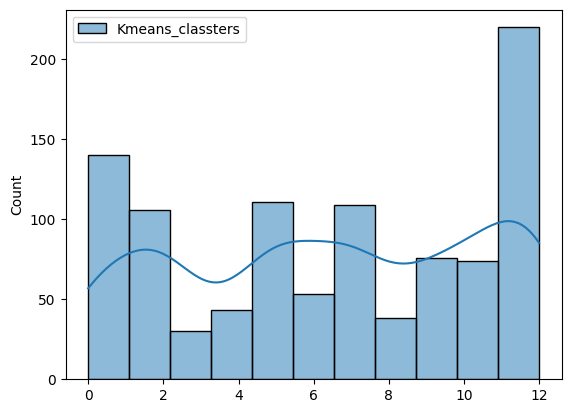

In [26]:
# Смотрим распределение данных по кластерам
sns.histplot(data = {"Kmeans_classters": kmeans_prediction}, 
             kde=True)
plt.show()

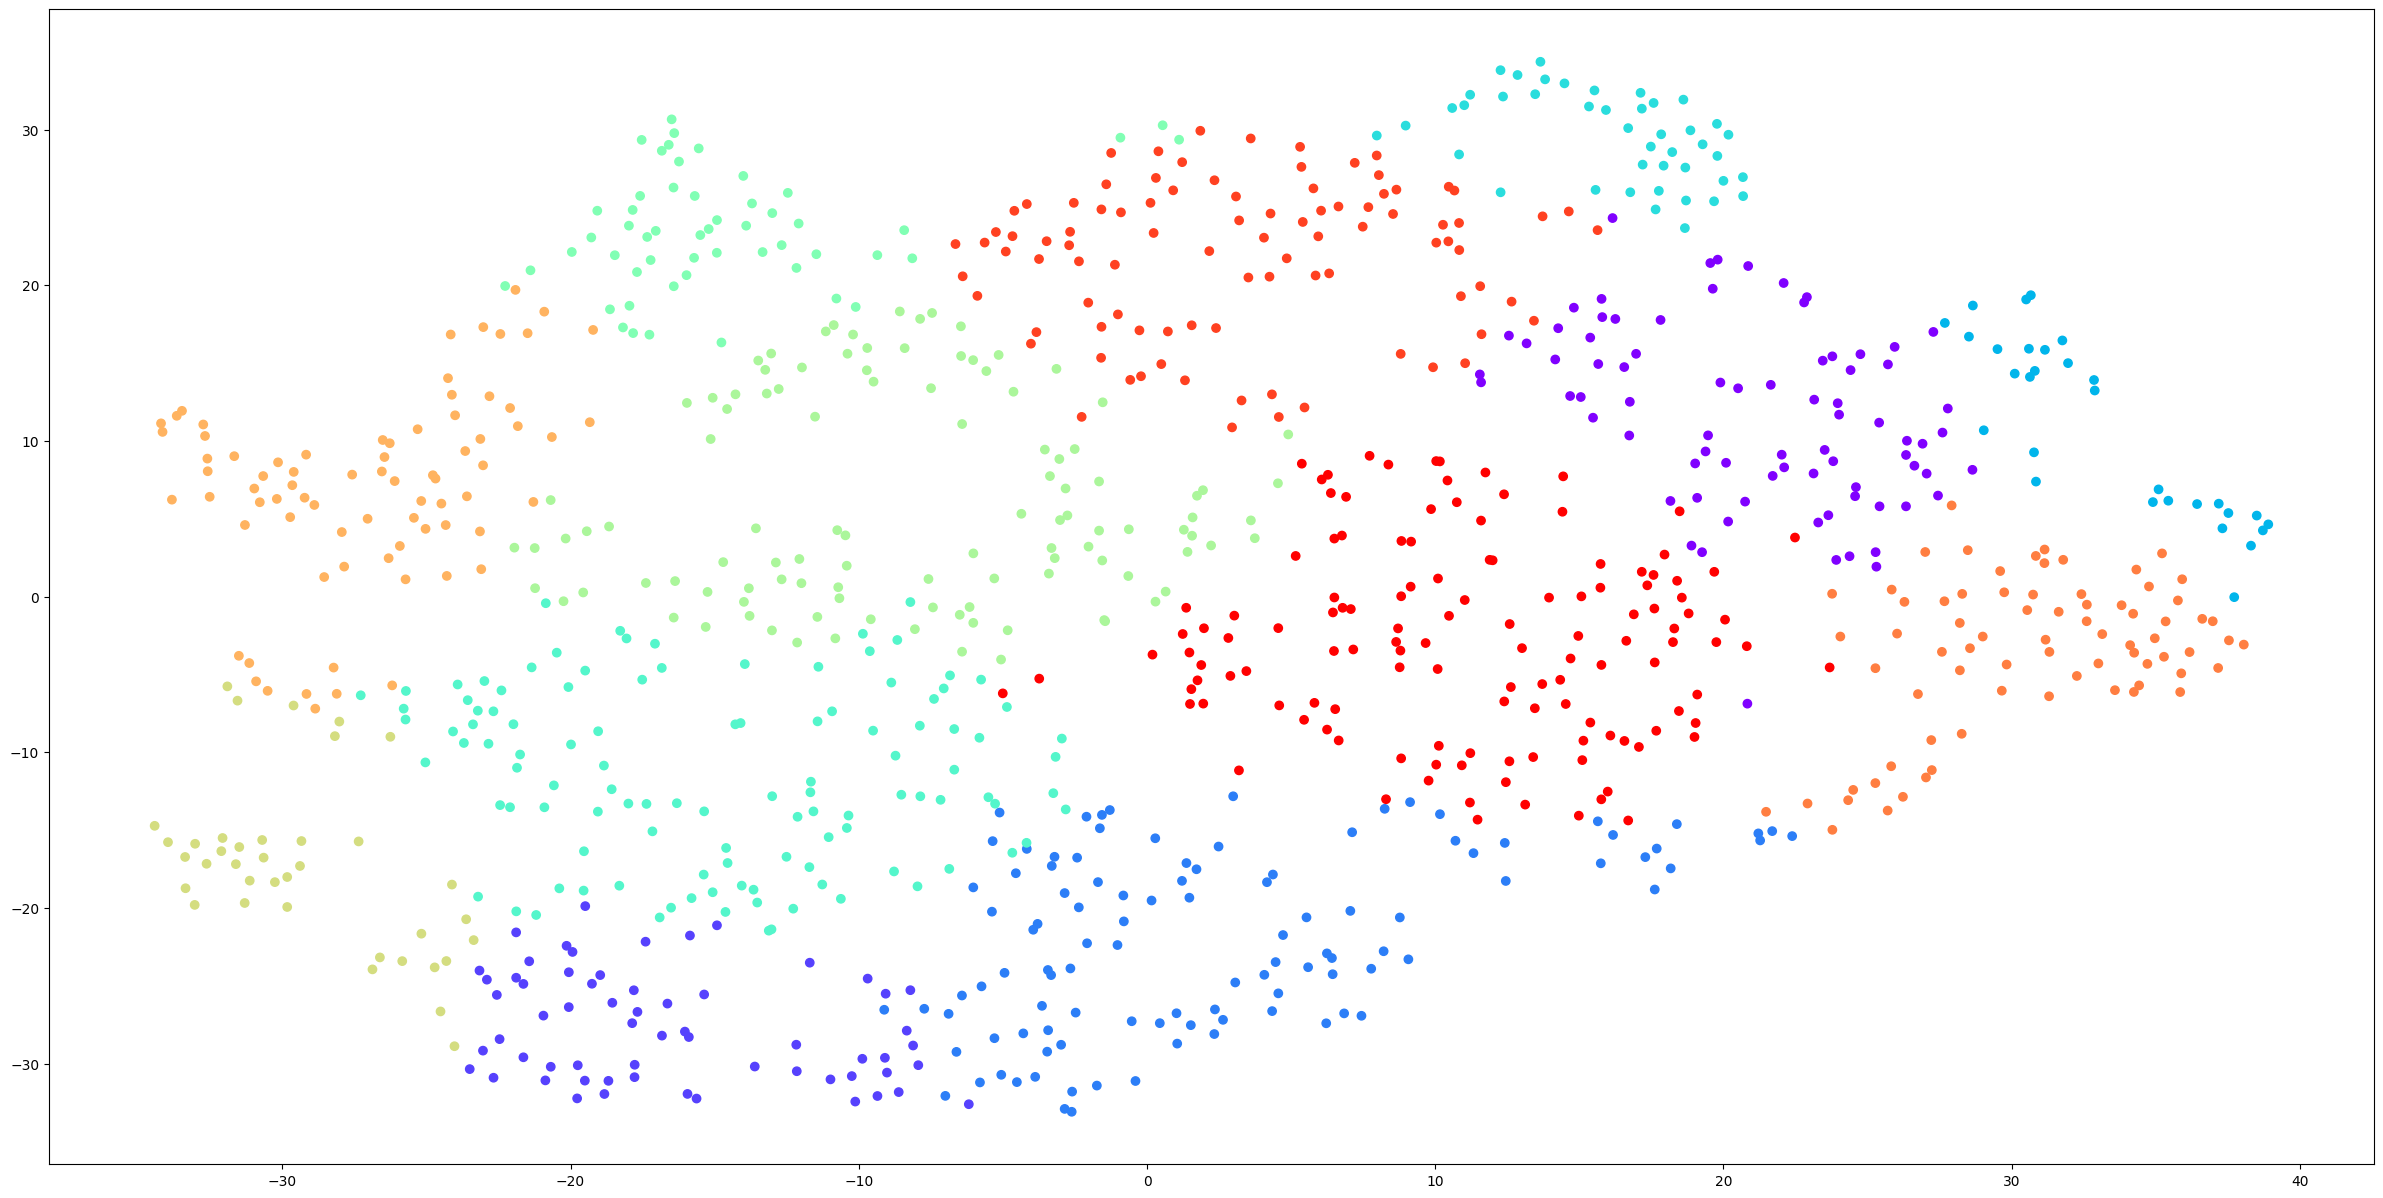

In [27]:
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot()
ax.scatter(tsne_clusters_number[:, 0], tsne_clusters_number[:, 1], c=kmeans.labels_, marker='o', cmap='rainbow')
# ax.set_title("%s: (%.2g sec)" % (label, t1 - t0))
ax.axis('tight')
plt.show()

### На основании вышеполученной информации, попроубем разбить данные на 14 класстеров

In [28]:
kmeans = KMeans(
    n_clusters=14, # На сколько кластеров поделить наш ДС
    init='random', # Начальная инициализация центров кластеров
    n_init=10, # Начальное колиечтво этих точек (центров класстеров)
    max_iter=300, # 
    tol=1e-04 # Величина изменения при сдвиге
)
kmeans_prediction = kmeans.fit_predict(df)

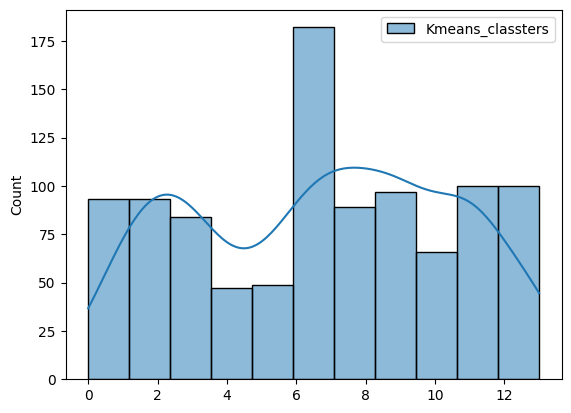

In [29]:
# Смотрим распределение данных по кластерам
sns.histplot(data = {"Kmeans_classters": kmeans_prediction}, 
             kde=True)
plt.show()

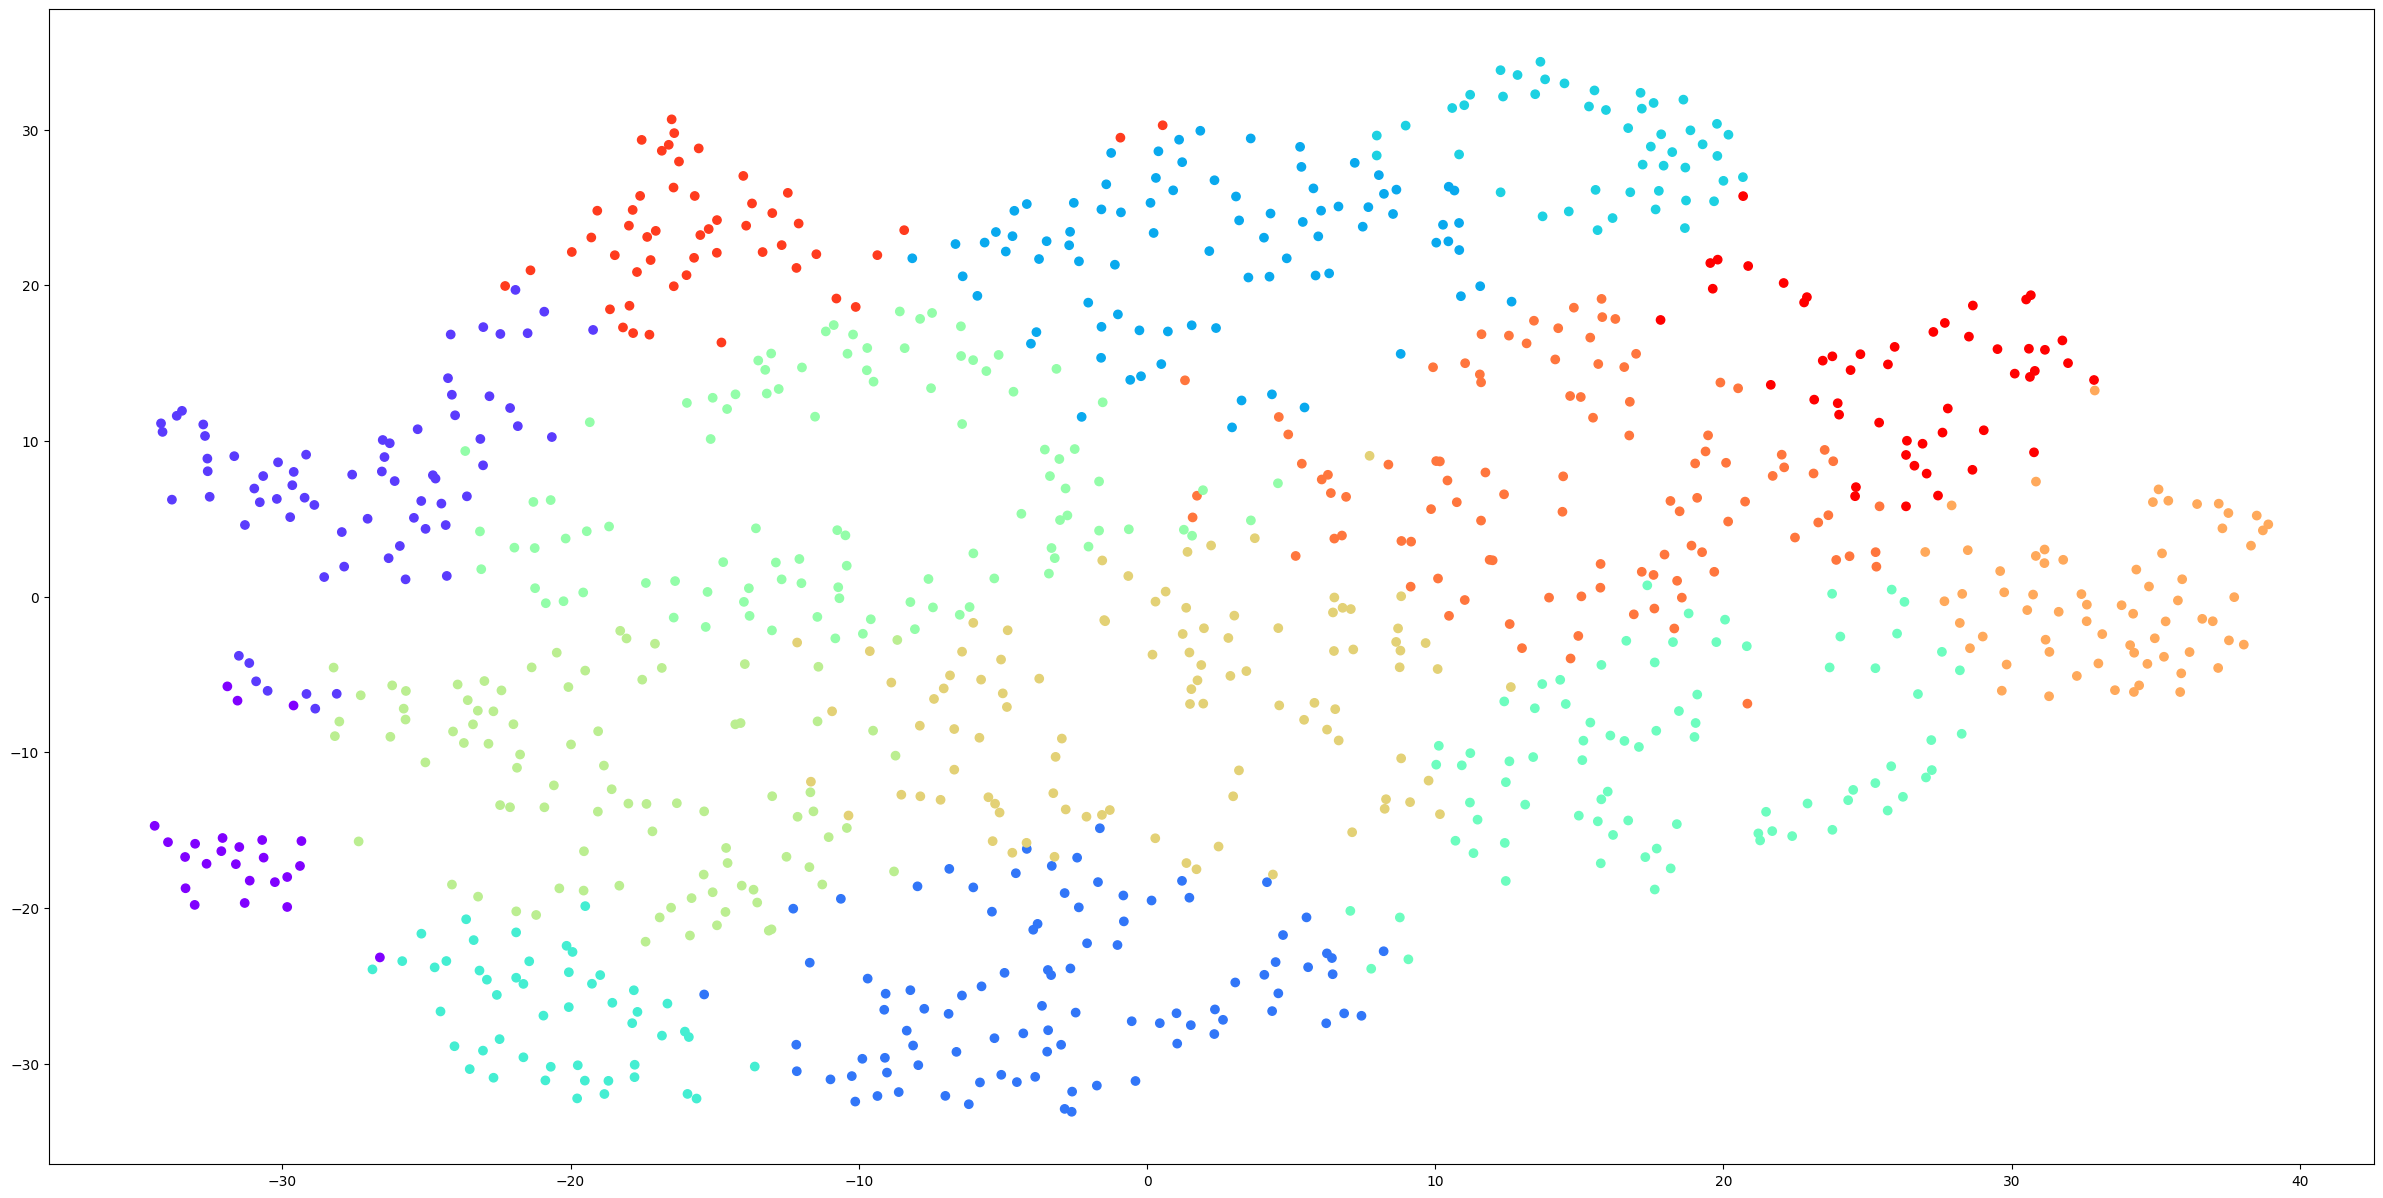

In [30]:
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot()
ax.scatter(tsne_clusters_number[:, 0], tsne_clusters_number[:, 1], c=kmeans.labels_, marker='o', cmap='rainbow')
# ax.set_title("%s: (%.2g sec)" % (label, t1 - t0))
ax.axis('tight')
plt.show()

### На основании вышеполученной информации, попроубем разбить данные на 15 класстеров

In [31]:
kmeans = KMeans(
    n_clusters=15, # На сколько кластеров поделить наш ДС
    init='random', # Начальная инициализация центров кластеров
    n_init=10, # Начальное колиечтво этих точек (центров класстеров)
    max_iter=300, # 
    tol=1e-04 # Величина изменения при сдвиге
)
kmeans_prediction = kmeans.fit_predict(df)
kmeans_prediction

array([ 2, 12,  5, 10,  3, 13,  3,  2, 12,  0,  2,  7,  5,  3,  6,  7,  6,
       13, 10,  0,  8,  3,  7,  2,  9, 10,  8,  3,  0,  4,  2,  4,  4,  5,
        0, 12, 10,  3,  5, 10,  5, 13,  0, 13,  4,  9,  4,  7, 11,  8,  7,
       10,  4,  2, 11,  4,  0,  3,  9,  2,  2, 11,  7,  7, 10, 11,  8, 12,
       13,  5,  4, 14,  9,  3,  2,  7,  0,  4, 11,  4,  5, 14,  7,  8,  2,
        4, 10,  9, 10,  4,  8,  8, 12,  7,  4,  4,  2,  0, 11, 11,  0,  0,
        4,  8, 13, 10,  4, 13, 13,  3,  6,  3,  9,  0, 13,  7,  9, 12,  5,
        7,  5, 14,  7, 13, 12,  4,  4,  8,  5, 10, 12,  4,  8,  8,  5,  3,
        7,  7, 13,  8, 13,  3,  2,  9, 11,  2, 10,  2,  1,  5,  3,  5,  2,
        0,  0,  3, 13,  0,  7,  6,  7,  2,  8,  1, 13, 12,  7,  7,  7,  2,
        3, 14,  9, 10,  0,  3, 12,  7,  4,  8,  7, 10,  7,  2,  0,  7, 11,
        5, 14, 12, 10,  0,  6,  8,  7,  2,  7,  1,  8,  5,  8,  3,  5,  0,
       12,  4, 13, 13, 13,  6, 13,  3,  8,  9, 10,  8,  5, 10,  7,  1, 12,
        3,  4,  5,  8,  3

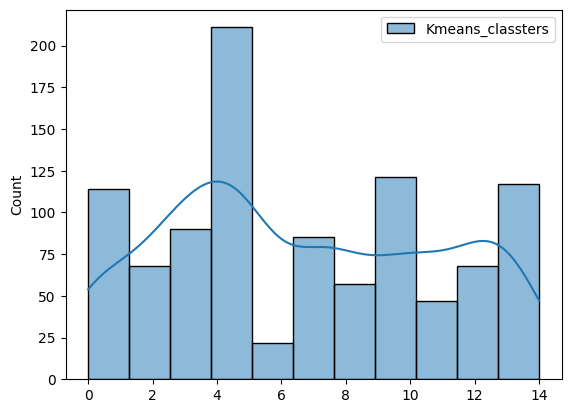

In [32]:
# Смотрим распределение данных по кластерам
sns.histplot(data = {"Kmeans_classters": kmeans_prediction}, 
             kde=True)
plt.show()

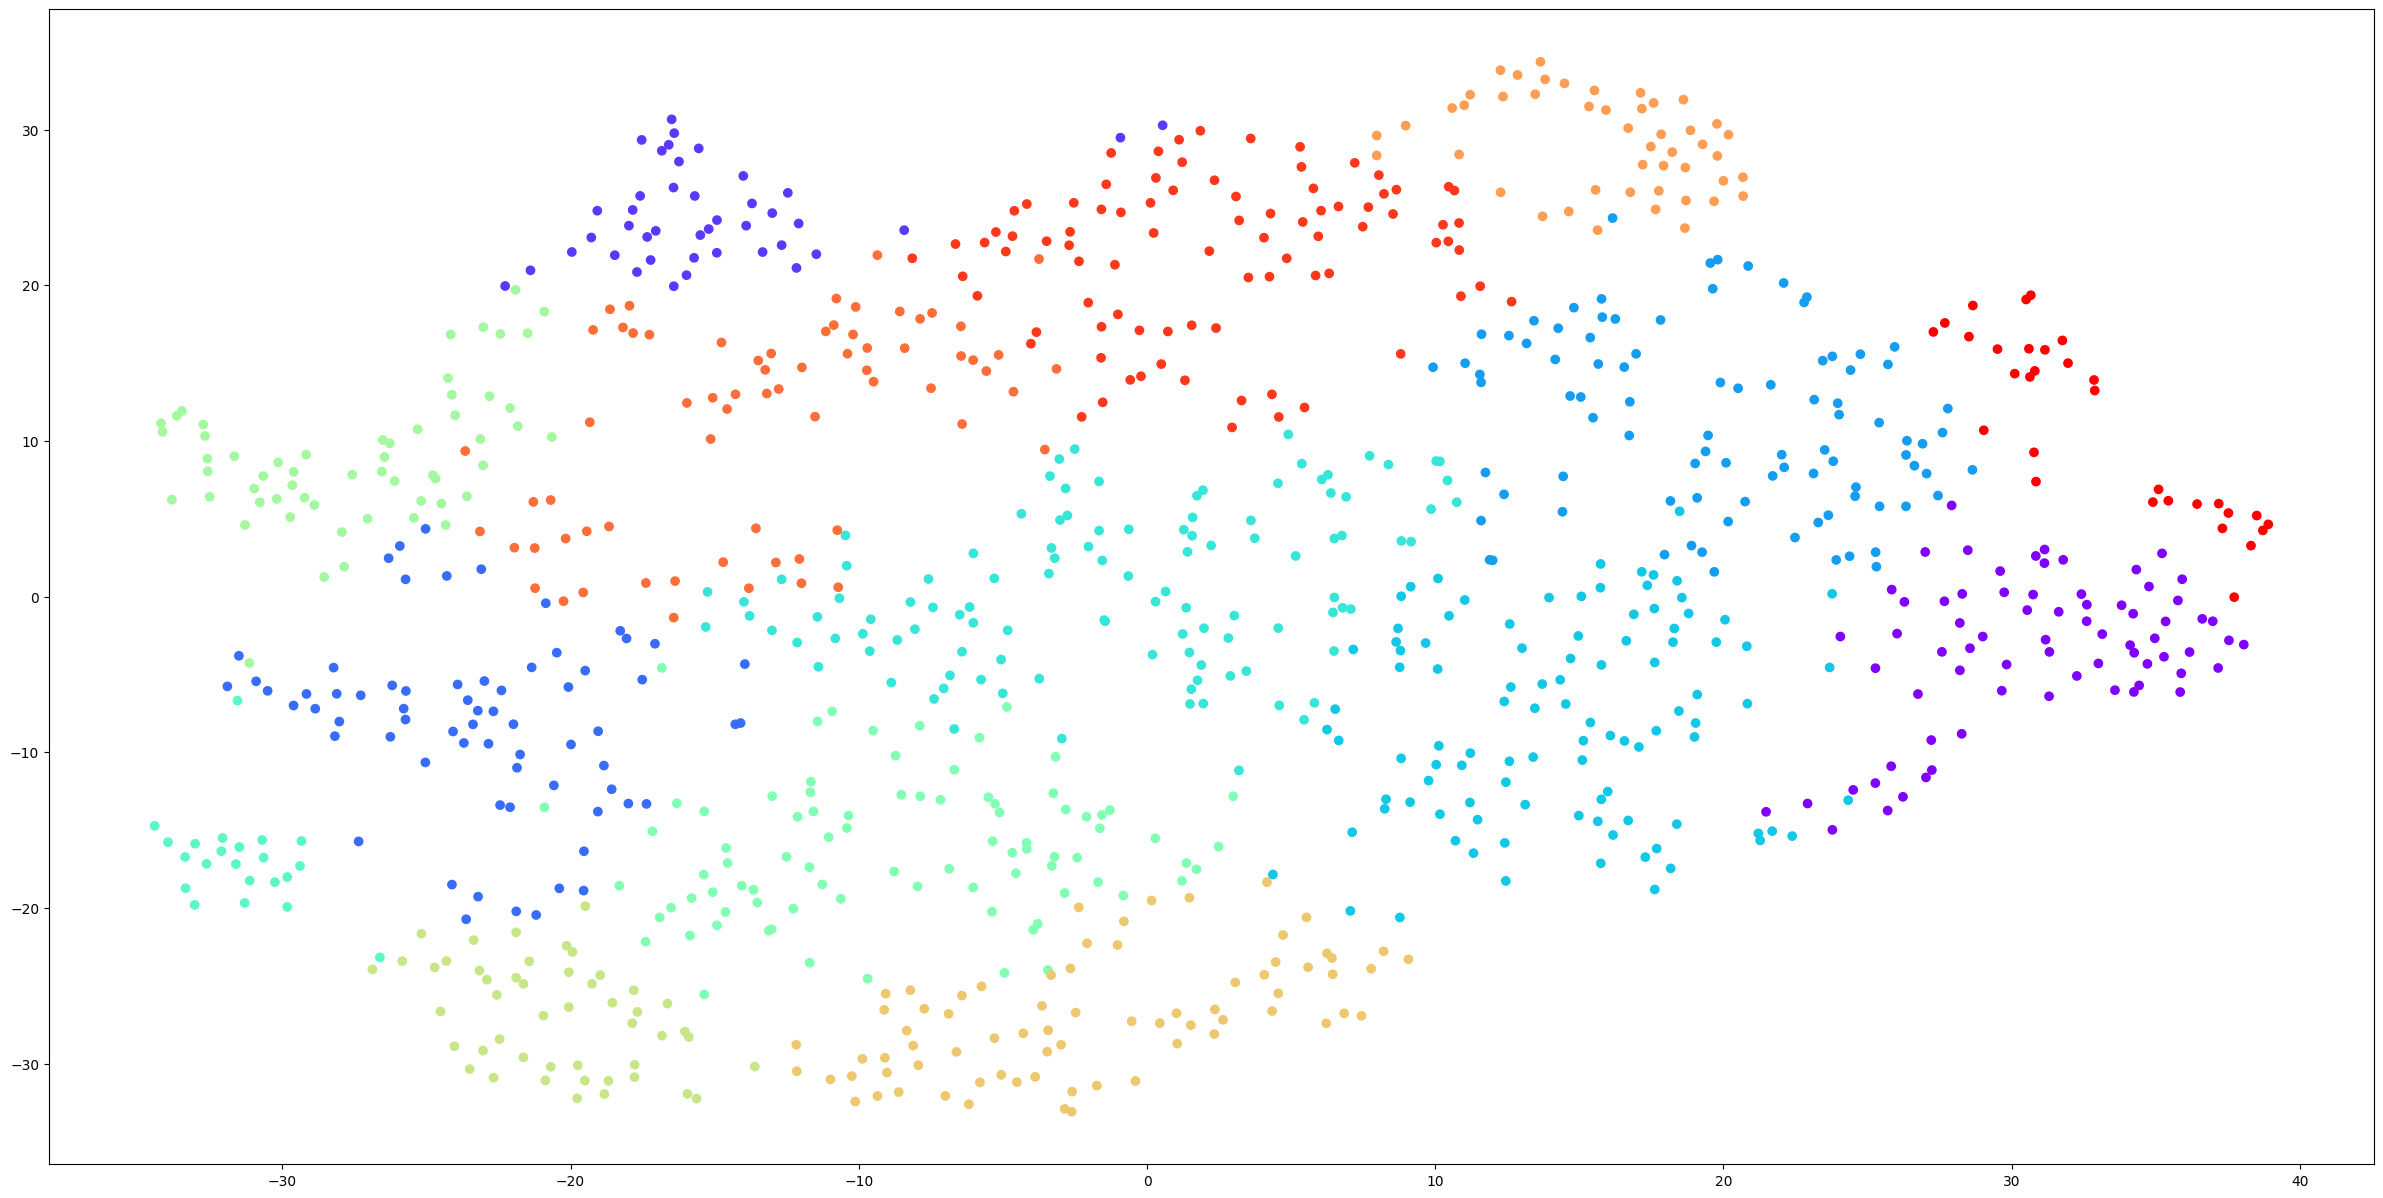

In [33]:
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot()
ax.scatter(tsne_clusters_number[:, 0], tsne_clusters_number[:, 1], c=kmeans.labels_, marker='o', cmap='rainbow')
# ax.set_title("%s: (%.2g sec)" % (label, t1 - t0))
ax.axis('tight')
plt.show()

Как мы видим многие точки находятся довольно далеко от своих кластеров, попробуем другое разбиение

### Вывод
Если полагаться на визуальный анализ, то 9 класстеров является наилучшим результатом
Выбросы из класетров имеются, но их единицы

## На основании вышеполученной информации, разобьем данные на 9 класстеров

In [88]:
kmeans = KMeans(
    n_clusters=9, # На сколько кластеров поделить наш ДС
    init='random', # Начальная инициализация центров кластеров
    n_init=10, # Начальное колиечтво этих точек (центров класстеров)
    max_iter=300, # 
    tol=1e-04 # Величина изменения при сдвиге
)
kmeans_prediction = kmeans.fit_predict(df)

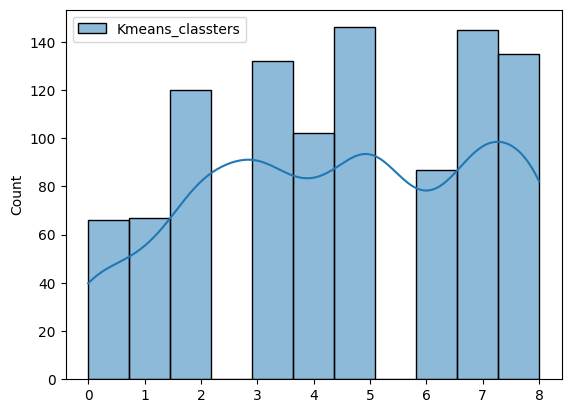

In [89]:
# Смотрим распределение данных по кластерам
sns.histplot(data = {"Kmeans_classters": kmeans_prediction}, 
             kde=True)
plt.show()

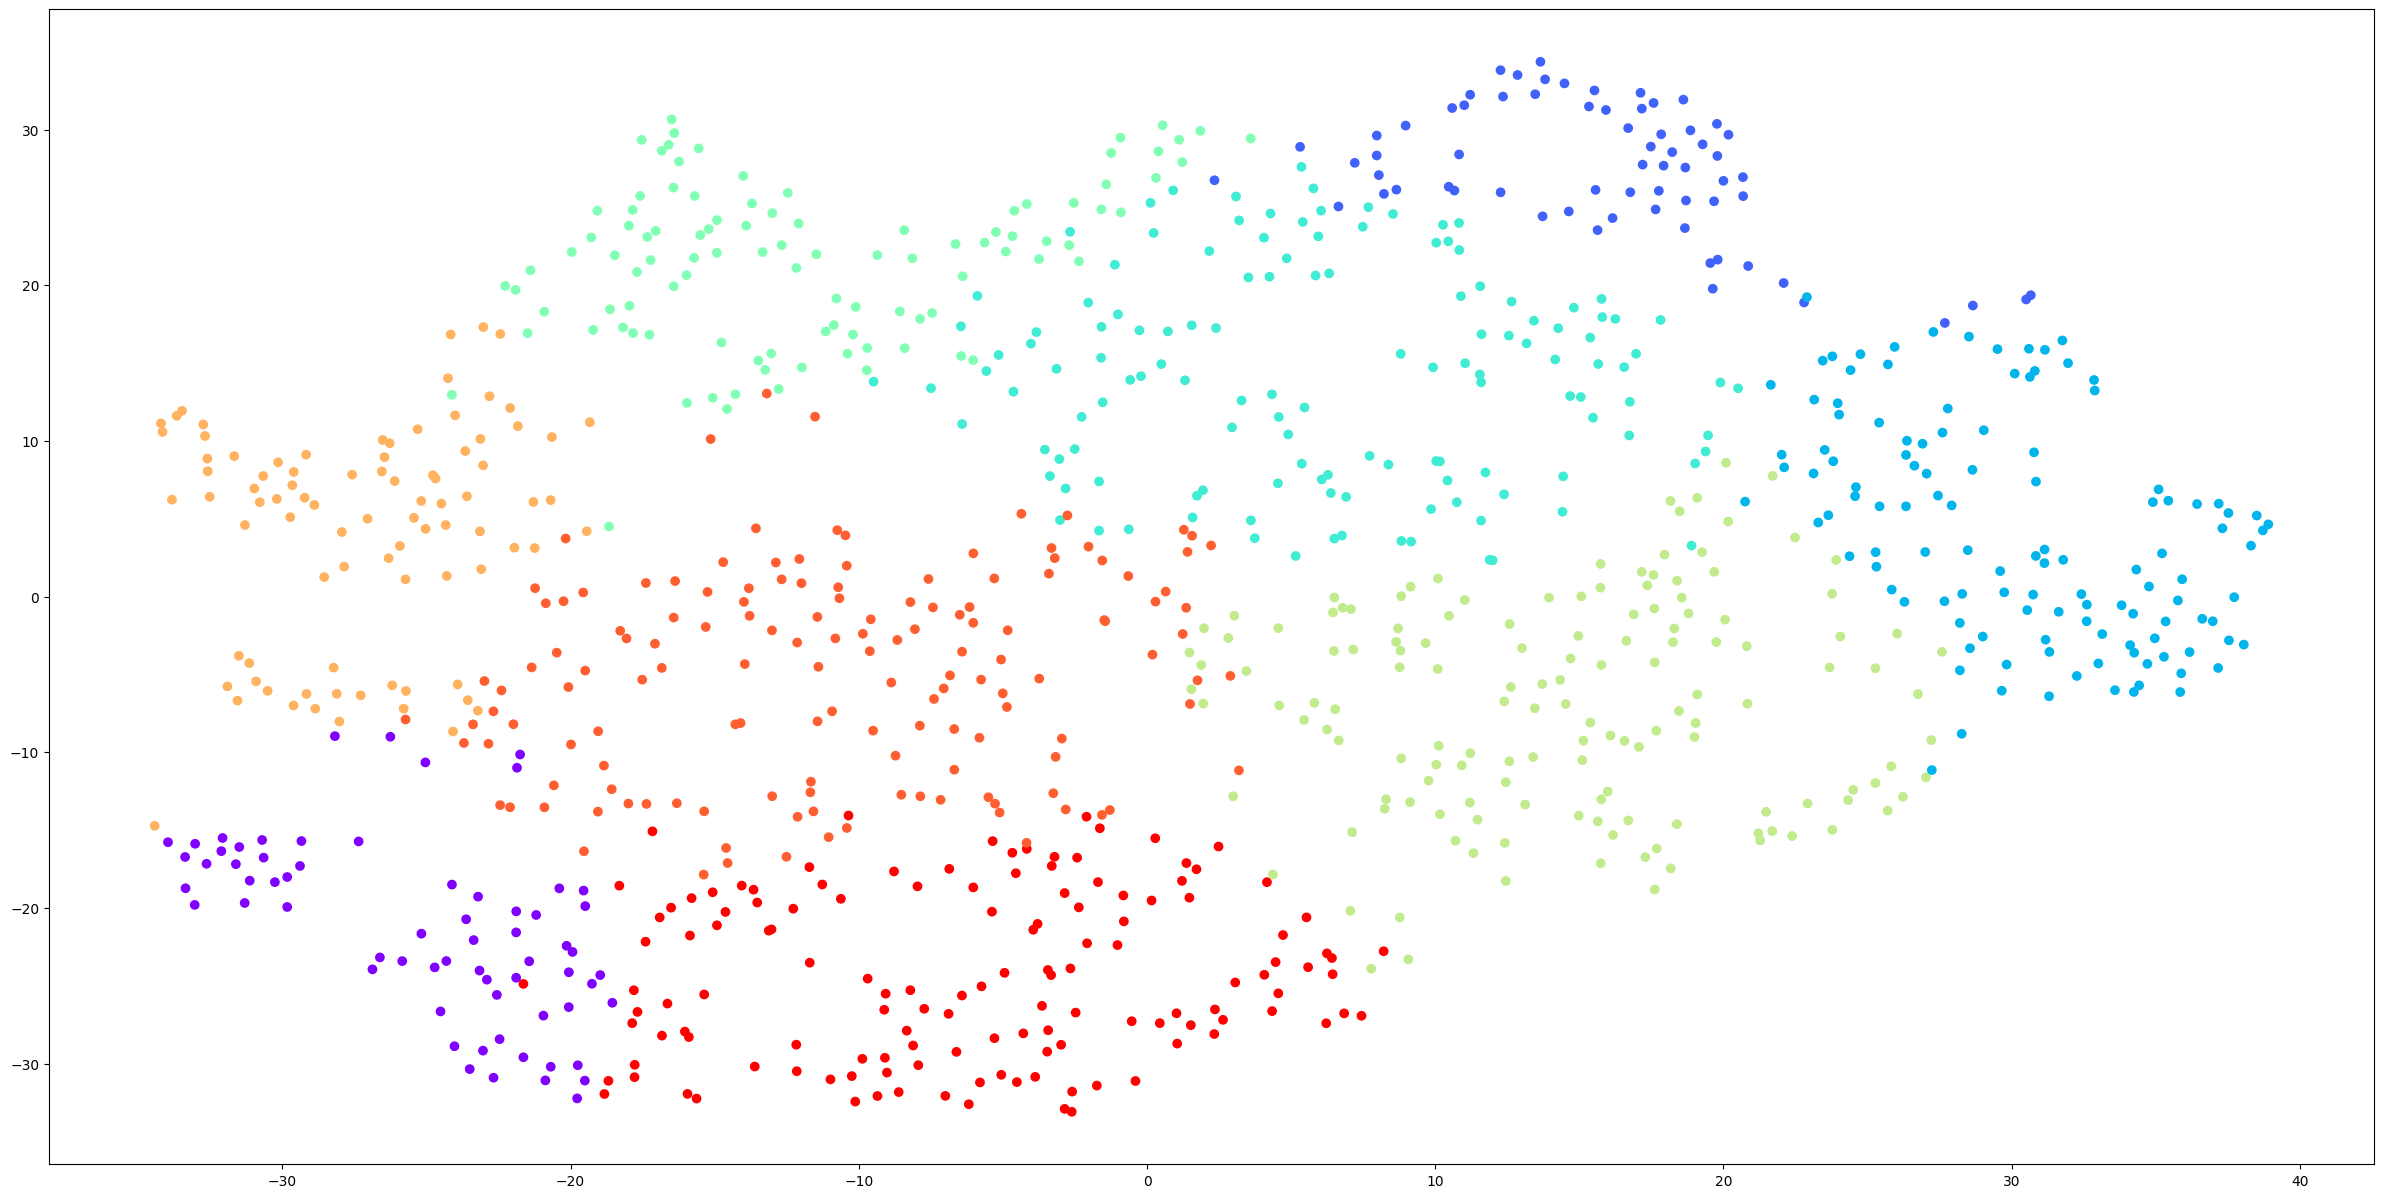

In [90]:
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot()
ax.scatter(tsne_clusters_number[:, 0], tsne_clusters_number[:, 1], c=kmeans.labels_, marker='o', cmap='rainbow')
# ax.set_title("%s: (%.2g sec)" % (label, t1 - t0))
ax.axis('tight')
plt.show()

# Обучим классификатор "дерево решений" и посмотрим по каким параметрам определяется класс

In [91]:
df.shape

(1000, 11)

In [128]:
x = df
y = kmeans.labels_

In [129]:
# Get train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [161]:
# Classifier
np.random.seed(42)

param_grid = {# 'max_features': ['sqrt', 'log2'], # Макс кол-во признаков в листе
             'ccp_alpha': [0.1, .01, .001], # Внутренняя подстройка параметров
             'max_depth': [3, 9], # Макс глубина дерева
             # 'criterion': ['gini', 'entropy', 'log_loss'] # Функция для измерения качества разделения.
              'criterion': ['gini'] # Оптимален
             }
dec_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dec_tree, param_grid=param_grid, cv=9, verbose=True)
grid_search.fit(x_train, y_train)
best_dec_tree = grid_search.best_estimator_

Fitting 9 folds for each of 6 candidates, totalling 54 fits


In [162]:
score = accuracy_score(y_test, best_dec_tree.predict(x_test))
print("accuracy:", score)

accuracy: 0.91


In [164]:
plt.figure(figsize=(300,50))
tree.plot_tree(best_dec_tree, feature_names=df.columns[:], fontsize=20)
plt.savefig('Dtree.png')

In [ ]:
df.columns

## На что модель смотрит в первую очередь:

1) 'Поверхностная плотность, г/м2'
2) 'Прочность при растяжении, МПа'
3) 'Прочность при растяжении, МПа' 
4) 'Поверхностная плотность, г/м2'

5) 'Модуль упругости при растяжении, МПа'
6) 'Количество отвердителя, м.%'
7) 'Температура вспышки, С_2'
8) 'Плотность нашивки'



